In [1]:
# ME-241 Engineering Computations
# Problem 2 - 1D heat conduction
# Group #18: Danny Randles, Edgar Marquez, Will Suddeth

[3.00e+02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02 3.84e-02
 3.84e-02 0.00e+00]
[[  1.   0.   0. ...   0.   0.   0.]
 [  1.  -2.   1. ...   0.   0.   0.]
 [ -1.  16. -30. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... -30.  16.  -1.]
 [  0.   0.   0. ...   1.  -2.   1.]
 [  0.   0.   0. ...   0.   0.   1.]]


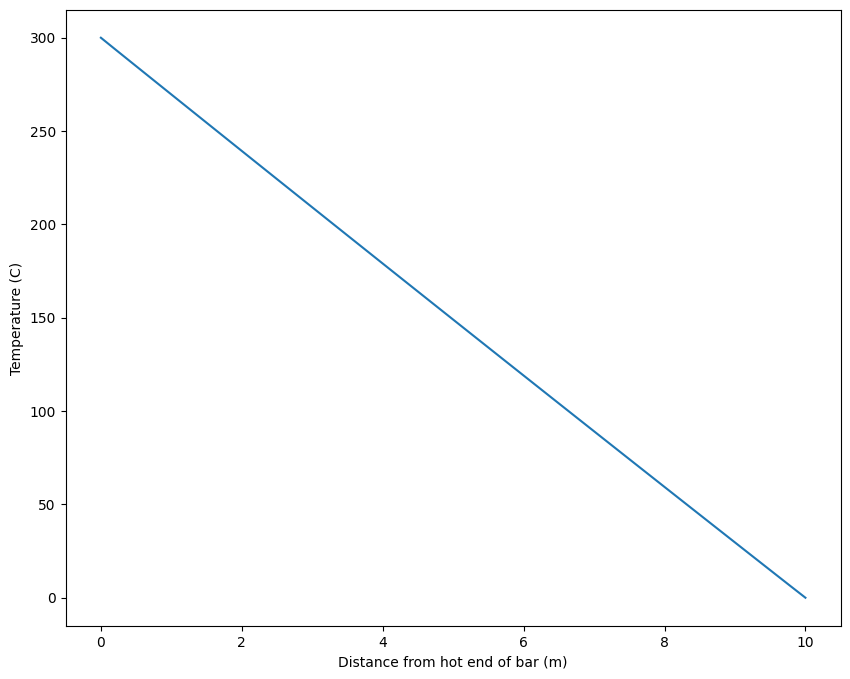

In [18]:
# importing modules for matrix and plotting
import numpy as np
import matplotlib.pyplot as plt

# defining material properties
LBar   =         10     # length of bar: meters
kCond  =         250    # thermal conductivity: W/m/C
hConv  =         5      # convection coefficient: W/m^2/C
xsInit =         0.1    # initial cross-section area: m^2
Tair   =         20     # air temp: Celsius
n      =         50     # number of sections
sHeat  =         2      # heat gen per unit length: W/m
# boundary condition
Tinit  =         300    # initial bar temp: C


dx = LBar/n

# setting up LHS matrix
A = np.zeros((n,n))

# defining initial value
A[0,0]  = 1
A[-1,-1]  = 1


# defining 2nd row
A[1,0]  =  1
A[1,1]  = -2
A[1,2]  =  1

# defining 2nd to last row
A[-2,-1]  =  1
A[-2,-2]  = -2
A[-2,-3]  =  1

# for loop
for i in range(2, n-2):
    A[i,i-2] = -1
    A[i,i-1] =  16
    A[i,i]   = -30
    A[i,i+1] =  16
    A[i,i+2] =  -1

# matrix b
b = np.full(n, ((sHeat/(kCond*xsInit)))*12*(dx**2))
b[0]  = 300
b[-1] = 0 # this isnt right determine second bound

vectors = np.linalg.solve(A, b)


print(b)
print(A)

### TEST ###
xvals = np.linspace(0, 10, n)

plt.figure(figsize=(10,8))
plt.plot(xvals, vectors)
plt.plot(5, 50)
plt.xlabel('Distance from hot end of bar (m)')
plt.ylabel('Temperature (C)')
plt.show()